Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


Define Utility Functions

In [1]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def preprocess_data(df):
    # Extract features (X) and labels (y)
    df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

    # Memeriksa dan menangani nilai NaN
    if df['Category'].isna().sum() > 0:
        df.dropna(subset=['Category'], inplace=True)

    X = np.array(df['Message'])
    y = np.array(df['Category'])  # Assuming 'Category' represents the target variable

    # Check for NaN values in y
    if np.isnan(y).any():
        raise ValueError("Target variable y contains NaN values after preprocessing.")

    cv = CountVectorizer(stop_words='english')

    X_vectorized = cv.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    # Check for NaN values in y_train and y_test
    if np.isnan(y_train).any() or np.isnan(y_test).any():
        raise ValueError("y_train or y_test contains NaN values after train_test_split.")

    return X_train, X_test, y_train, y_test

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    display_confusion_matrix(y_test, y_pred, f"Confusion Matrix for {model_name}")

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

Load and Preprocess data

In [4]:
# Load and preprocess data
filepath = '/content/email.csv'
df = load_data(filepath)
X_train, X_test, y_train, y_test = preprocess_data(df)

Train and Evaluate Models

Naive Bayes Model Performance:
Accuracy: 0.9811659192825112
Precision: 0.9155844155844156
Recall: 0.9463087248322147
F1 Score: 0.9306930693069307


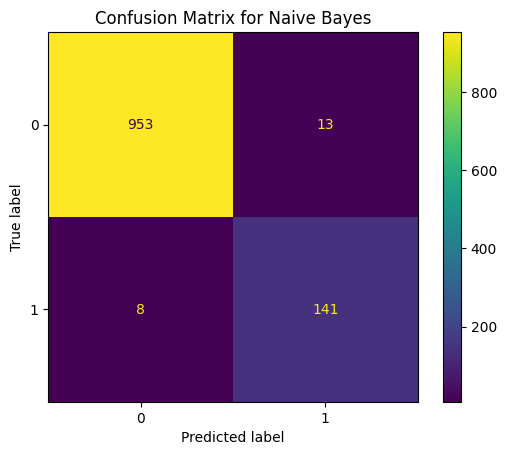

In [5]:
# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
train_and_evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Naive Bayes")

Random Forest Model Performance:
Accuracy: 0.9766816143497757
Precision: 1.0
Recall: 0.825503355704698
F1 Score: 0.9044117647058824


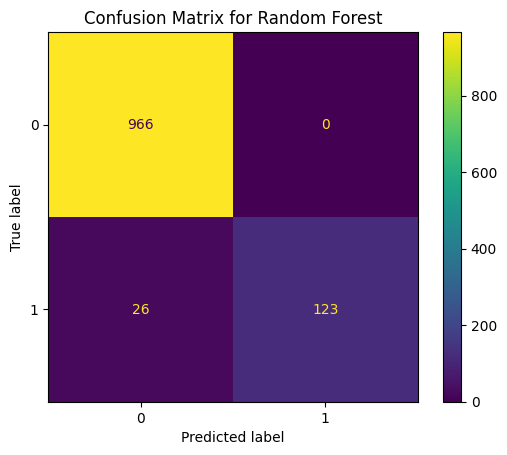

In [6]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=100)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

SVM Model Performance:
Accuracy: 0.9408071748878923
Precision: 1.0
Recall: 0.5570469798657718
F1 Score: 0.7155172413793103


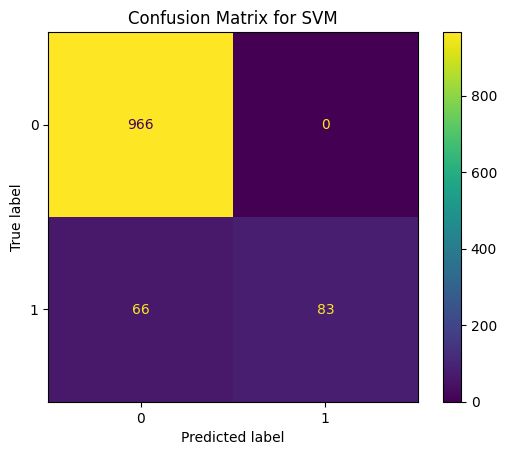

In [7]:
# Train and evaluate SVM
svm_model = SVC(kernel='poly')
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")
